In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

In [7]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [9]:
features = df[['SALES', 'QUANTITYORDERED']].copy()



Missing values before drop: 0
Missing values after drop: 0


In [10]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
df_scaled = pd.DataFrame(scaled_features, columns=['SALES', 'QUANTITYORDERED'])


--- Finding K with Elbow Method ---


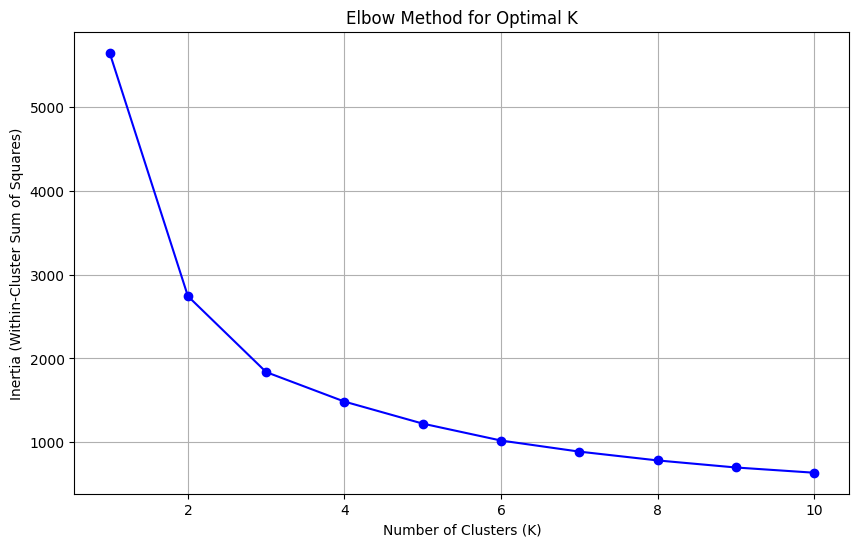

Look at the graph! The 'elbow' is the optimal K.


In [11]:

print("\n--- Finding K with Elbow Method ---")
inertia = []  # This will store the inertia (WCSS) for each K
k_range = range(1, 11) # We will test K from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k,         # The number of clusters to form
                    init='k-means++',     # Smart initialization of centroids
                    n_init=10,            # Run 10 times with different random seeds
                    random_state=42)      # For reproducible results
    
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-') # 'bo-' creates a blue line with dots
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

print("Look at the graph! The 'elbow' is the optimal K.")
# From the graph, let's assume the elbow is at K=4 (this is a common result for this)
chosen_k = 4  # <-- CHANGE THIS based on what your graph shows!


--- Running K-Means with K=4 ---


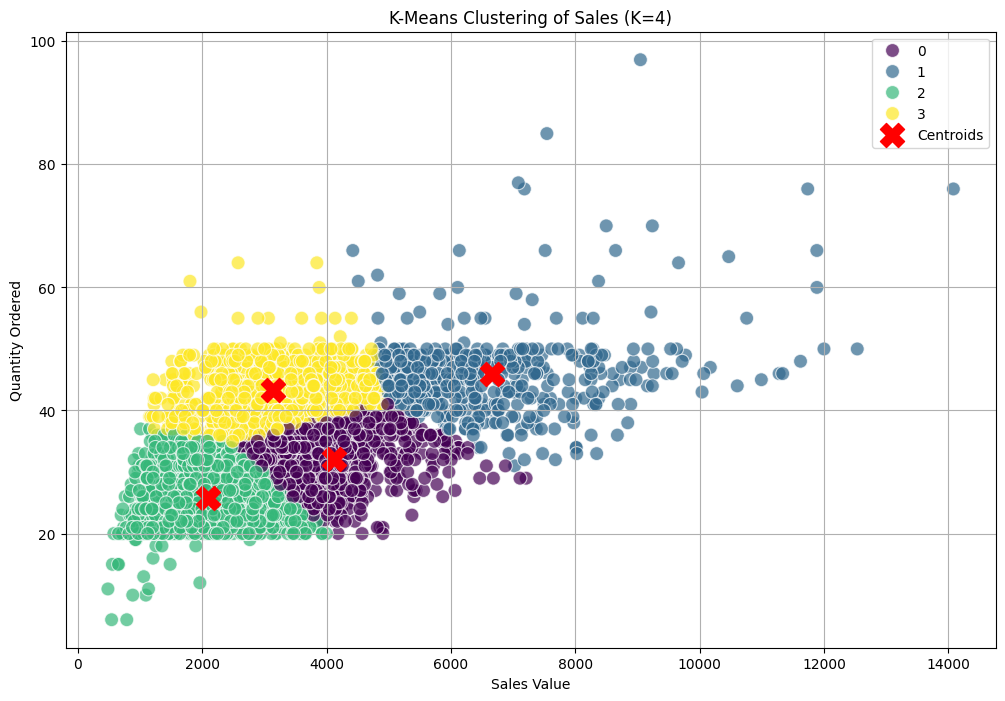


--- Cluster Analysis ---
               SALES  QUANTITYORDERED
cluster                              
0        4128.252938        32.185309
1        6660.929744        45.972281
2        2089.173980        25.850980
3        3135.880041        43.345578


In [12]:
print(f"\n--- Running K-Means with K={chosen_k} ---")
kmeans = KMeans(n_clusters=chosen_k, init='k-means++', n_init=10, random_state=42)
kmeans.fit(df_scaled)


cluster_labels = kmeans.labels_

features['cluster'] = cluster_labels

# --- 7. Visualize the Clusters ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=features,
    x='SALES',
    y='QUANTITYORDERED',
    hue='cluster',  # Color the points based on their assigned cluster
    palette='viridis', # A nice color palette
    s=100,          # Size of the points  
)


centers_scaled = kmeans.cluster_centers_

centers_original = scaler.inverse_transform(centers_scaled)


plt.scatter(
    centers_original[:, 0], # Center's X (SALES)
    centers_original[:, 1], # Center's Y (QUANTITYORDERED)
    marker='X',
    s=300,                  # Size of the marker
    c='red',                # Color
    label='Centroids'
)

plt.title(f'K-Means Clustering of Sales (K={chosen_k})')
plt.xlabel('Sales Value')
plt.ylabel('Quantity Ordered')
plt.legend()
plt.grid(True)
plt.show()

# --- 8. Analyze the Results ---
print("\n--- Cluster Analysis ---")
# Let's look at the average SALES and QUANTITY for each cluster
cluster_summary = features.groupby('cluster').mean()
print(cluster_summary)